In [2]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [3]:
def __mkdir(*args):
    path = os.path.join(*args)
    try: 
        os.makedirs(path)
    except OSError:
        if not os.path.isdir(path):
            raise
    return path

In [4]:

# Set working directory as the current directory of the ipython notebook
working_dir = os.getcwd()
data_dir = __mkdir(working_dir, "data")

In [5]:
mm = pd.read_pickle(os.path.join(data_dir, 'mm.pckl')) 
mm.head(10)

,ngram,nct_id,criteria_id,ngram_index,score,term,cui,stype,cid
0,"((time, NN),)",NCT00001149,0,0,8.34,Time,C0040223,tmco,[G01.910]
1,"((uncontrolled, VBN), (seizure, NNS), (at, IN))",NCT00001149,0,8,16.21,Seizures,C0036572,sosy,"[C10.228.140.490.631, C10.597.742, C23.888.592..."
2,"((of, IN), (seizure, NNS), (during, IN))",NCT00001149,0,10,16.21,Seizures,C0036572,sosy,"[C10.228.140.490.631, C10.597.742, C23.888.592..."
3,"((seizure, NNS), (at, IN), (the, DT))",NCT00001149,0,11,16.21,Seizures,C0036572,sosy,"[C10.228.140.490.631, C10.597.742, C23.888.592..."
4,"((pattern, NN), (of, IN), (seizure, NNS))",NCT00001149,0,12,16.07,Seizures,C0036572,sosy,"[C10.228.140.490.631, C10.597.742, C23.888.592..."
5,"((seizure, NNS), (during, IN), (the, DT))",NCT00001149,0,13,16.21,Seizures,C0036572,sosy,"[C10.228.140.490.631, C10.597.742, C23.888.592..."
6,"((seizure, NNS), (at, IN))",NCT00001149,0,17,16.26,Seizures,C0036572,sosy,"[C10.228.140.490.631, C10.597.742, C23.888.592..."
7,"((the, DT), (present, NN), (time, NN))",NCT00001149,0,18,6.74,Time,C0040223,tmco,[G01.910]
8,"((seizure, NNS),)",NCT00001149,0,21,17.80,Seizures,C0036572,sosy,"[C10.228.140.490.631, C10.597.742, C23.888.592..."
9,"((uncontrolled, VBN), (seizure, NNS))",NCT00001149,0,22,16.26,Seizures,C0036572,sosy,"[C10.228.140.490.631, C10.597.742, C23.888.592..."


In [8]:
def get_terms_to_docs(mm):
    data = []
#     index = []
    for name, group in mm.groupby('cui'):
        g = group.drop_duplicates(subset='nct_id')
        nctids = g.nct_id.values
        term = g.term.values[0]
        stype = g.stype.values[0]
        d = {'cui': name, 'term': term, 'nct_ids': nctids, 'num_docs': len(nctids), 'stype': stype}
        data.append(d)
#         index.append(name)
#     df = pd.DataFrame(data, index=index).sort_values(by='num_docs', ascending=False)
    df = pd.DataFrame(data)
    return df

def get_docs_to_terms(mm, ctgov_data):
    data = []
#     index = []
    for name, group in mm.groupby('nct_id'):
        g = group.drop_duplicates(subset='cui')
        cuis = g.cui.values
        terms = g.term.values
        title = ctgov_data[ctgov_data['id_info.nct_id'] == name].brief_title.values[0]
        url = 'https://clinicaltrials.gov/ct2/show/' + name
        d = {'cuis': cuis, 'terms': terms, 'nct_id': name, 'num_terms': len(cuis), 'title': title, 'url': url}
        data.append(d)
#         index.append(name)
#     df = pd.DataFrame(data, index=index).sort_values(by='num_docs', ascending=False)
    #df = pd.DataFrame(data).sort_values(by='num_terms', ascending=False)
    df = pd.DataFrame(data).sort(['num_terms'], ascending=False)
    return df

In [9]:
ctgov = pd.read_pickle(os.path.join(data_dir, 'ctgov.pckl'))
docs_to_terms = get_docs_to_terms(mm, ctgov)
docs_to_terms.to_pickle(os.path.join(data_dir, 'trials.pckl'))
docs_to_terms.head(100)

,cuis,nct_id,num_terms,terms,title,url
1126,"[C0017324, C0013819, C0014544, C0008902, C0008...",NCT02220972,183,"[Generalization (Psychology), Electroencephalo...",To Evaluate the Effect of Perampanel on Object...,https://clinicaltrials.gov/ct2/show/NCT02220972
310,"[C0030705, C0021966, C0206726, C0042950, C0017...",NCT00441142,181,"[Patients, Iodides, gliosarcoma, Volition, Gli...",Zactima With Temodar During Radiation Treatmen...,https://clinicaltrials.gov/ct2/show/NCT00441142
888,"[C0024554, C0086582, C0015176, C0042950, C0015...",NCT01713946,167,"[Male gender, Males, Europe, Volition, Female,...",A Placebo-controlled Study of Efficacy & Safet...,https://clinicaltrials.gov/ct2/show/NCT01713946
598,"[C0015780, C0086287, C0043210, C0024554, C0086...",NCT01070316,164,"[Female, Females, Woman, Male gender, Males, E...",Everolimus (RAD001) Therapy for Epilepsy in Pa...,https://clinicaltrials.gov/ct2/show/NCT01070316
446,"[C0006539, C0023226, C0043266, C0537670, C0021...",NCT00699972,159,"[Belarus, Legal Guardians, Writing (occupation...",Evaluating the Efficacy and Safety of E2007 (P...,https://clinicaltrials.gov/ct2/show/NCT00699972
447,"[C0006539, C0023226, C0043266, C0537670, C0021...",NCT00700310,158,"[Belarus, Legal Guardians, Writing (occupation...",Evaluating Efficacy and Safety of E2007 (Peram...,https://clinicaltrials.gov/ct2/show/NCT00700310
445,"[C0006539, C0023226, C0043266, C0537670, C0021...",NCT00699582,157,"[Belarus, Legal Guardians, Writing (occupation...",To Evaluate The Efficacy and Safety of E2007 (...,https://clinicaltrials.gov/ct2/show/NCT00699582
1019,"[C0537670, C0036572, C0376660, C0024501, C0085...",NCT01969851,151,"[Oprelvekin, Seizures, Diaries, Maintenance, C...",A Study to Investigate the Safety and Efficacy...,https://clinicaltrials.gov/ct2/show/NCT01969851
1022,"[C0001418, C0033572, C0007347, C0019932, C0023...",NCT01977651,149,"[Adenocarcinoma, Prostate, Male Castration, Ho...",A Study to Evaluate the Potential Increased Ri...,https://clinicaltrials.gov/ct2/show/NCT01977651
121,"[C0030705, C0043266, C0021810, C0023226, C0537...",NCT00144690,149,"[Patients, Writing (occupation or discipline),...",E2007 Given as Adjunctive Therapy in Patients ...,https://clinicaltrials.gov/ct2/show/NCT00144690


In [10]:
terms_to_docs = get_terms_to_docs(mm)
terms_to_docs.to_pickle(os.path.join(data_dir, 'terms.pckl'))
terms_to_docs.head(100)

,cui,nct_ids,num_docs,stype,term
0,C0000702,[NCT01532791],1,"bacs,nnon","DNA, A-Form"
1,C0000726,"[NCT00059137, NCT00254722, NCT00591487, NCT006...",19,blor,Abdomen
2,C0000727,[NCT01911702],1,sosy,"Abdomen, Acute"
3,C0000737,"[NCT00688662, NCT02428595]",2,sosy,Abdominal Pain
4,C0000768,"[NCT00001404, NCT00004399, NCT00004403, NCT000...",92,cgab,Congenital Abnormality
5,C0000772,"[NCT00873847, NCT01426542]",2,cgab,Multiple congenital anomalies
6,C0000786,"[NCT00513240, NCT01730170]",2,patf,Spontaneous abortion
7,C0000832,"[NCT00614744, NCT01222247]",2,patf,Abruptio Placentae
8,C0000833,"[NCT01380028, NCT01436695, NCT01977651, NCT022...",4,dsyn,Abscess
9,C0000854,"[NCT00056576, NCT00104416, NCT00144872, NCT001...",44,npop,Process of absorption


In [28]:
trials = pd.read_pickle(os.path.join(data_dir, 'trials.pckl'))
trials.head()

,cuis,nct_id,num_terms,terms,title,url
1126,"[C0017324, C0013819, C0014544, C0008902, C0008...",NCT02220972,183,"[Generalization (Psychology), Electroencephalo...",To Evaluate the Effect of Perampanel on Object...,https://clinicaltrials.gov/ct2/show/NCT02220972
310,"[C0030705, C0021966, C0206726, C0042950, C0017...",NCT00441142,181,"[Patients, Iodides, gliosarcoma, Volition, Gli...",Zactima With Temodar During Radiation Treatmen...,https://clinicaltrials.gov/ct2/show/NCT00441142
888,"[C0024554, C0086582, C0015176, C0042950, C0015...",NCT01713946,167,"[Male gender, Males, Europe, Volition, Female,...",A Placebo-controlled Study of Efficacy & Safet...,https://clinicaltrials.gov/ct2/show/NCT01713946
598,"[C0015780, C0086287, C0043210, C0024554, C0086...",NCT01070316,164,"[Female, Females, Woman, Male gender, Males, E...",Everolimus (RAD001) Therapy for Epilepsy in Pa...,https://clinicaltrials.gov/ct2/show/NCT01070316
446,"[C0006539, C0023226, C0043266, C0537670, C0021...",NCT00699972,159,"[Belarus, Legal Guardians, Writing (occupation...",Evaluating the Efficacy and Safety of E2007 (P...,https://clinicaltrials.gov/ct2/show/NCT00699972


In [60]:
terms = pd.read_pickle(os.path.join(data_dir, 'terms.pckl'))

top_terms = terms.sort_values(by='num_docs', ascending=False).head(100)

top_terms

,cui,nct_ids,num_docs,stype,term
776,C0012634,"[NCT00001205, NCT00001262, NCT00001289, NCT000...",818,dsyn,Disease
2347,C0036572,"[NCT00001149, NCT00001325, NCT00001489, NCT000...",719,sosy,Seizures
1277,C0019664,"[NCT00001149, NCT00001192, NCT00001666, NCT000...",651,ocdi,History
1278,C0019665,"[NCT00001149, NCT00001192, NCT00001666, NCT000...",651,inpr,Historical aspects qualifier
1985,C0030705,"[NCT00001149, NCT00001192, NCT00001205, NCT000...",618,podg,Patients
2556,C0039798,"[NCT00001205, NCT00001489, NCT00001666, NCT000...",607,ftcn,therapeutic aspects
907,C0014544,"[NCT00001325, NCT00001366, NCT00001489, NCT000...",584,dsyn,Epilepsy
400,C0006539,"[NCT00001149, NCT00001205, NCT00001289, NCT000...",489,geoa,Belarus
2768,C0043210,"[NCT00001666, NCT00001725, NCT00001932, NCT000...",446,popg,Woman
4163,C1704338,"[NCT00001205, NCT00001262, NCT00001932, NCT000...",440,qlco,diagnosis aspect


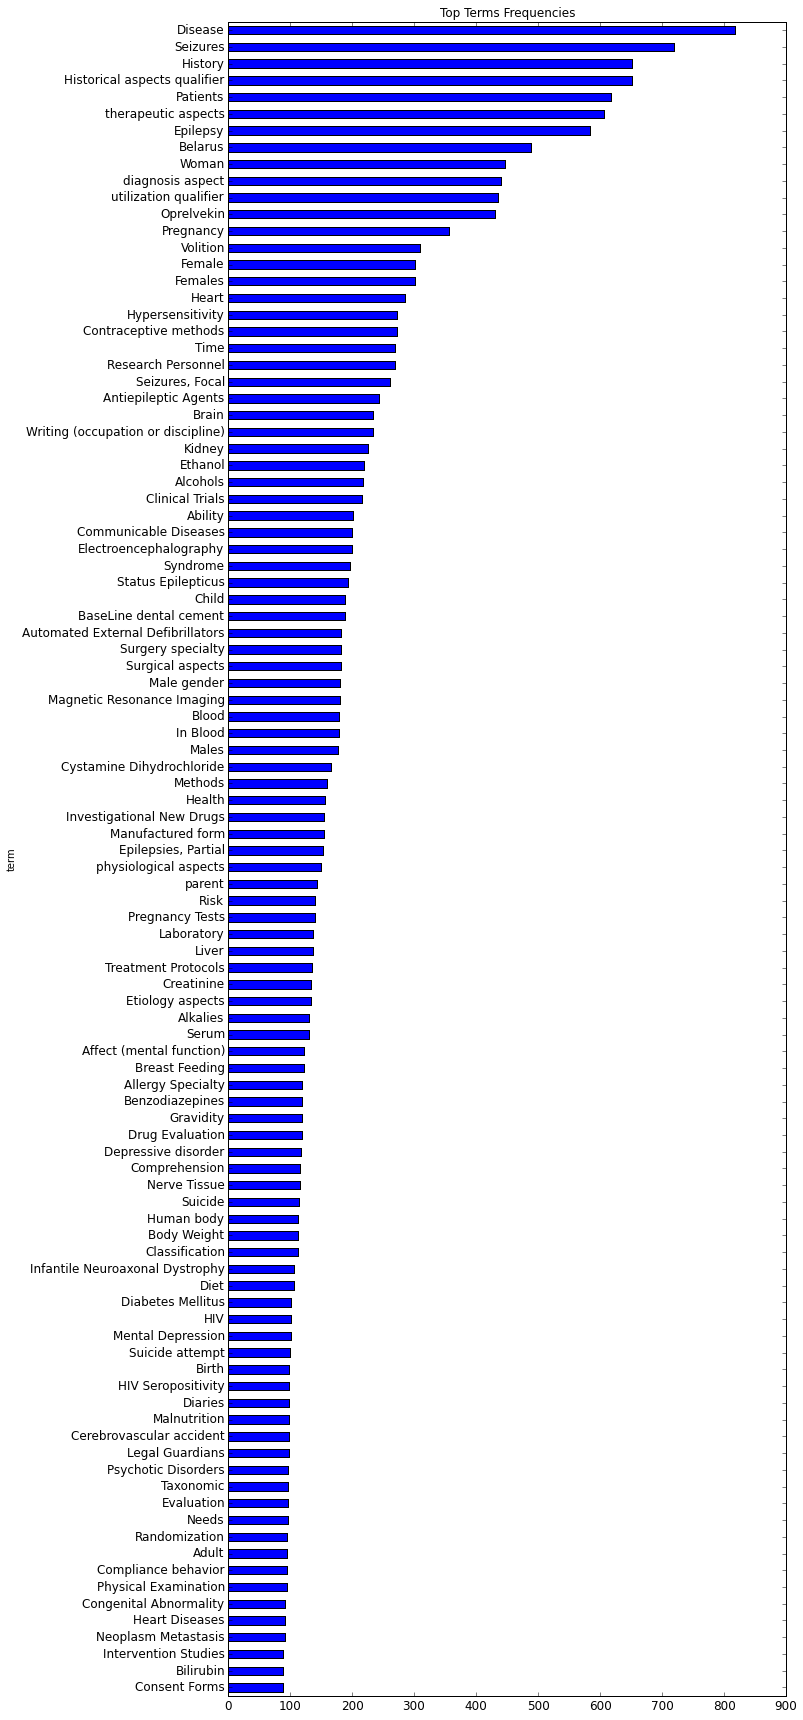

In [65]:

rcParams['figure.figsize'] = 10, 30 # control plot size
top_terms = terms.sort_values(by='num_docs', ascending=False).head(100)
top_terms = top_terms.set_index('term')
top_terms.sort_values(by='num_docs').num_docs.plot.barh(fontsize=12)
plt.title('Top Terms Frequencies')

# get_terms(N, k,m) and get_freqs realization

In [15]:
from operator import itemgetter

def get_freqs(terms, docs, perc=False):
    _docs = ('|'.join(doc) for doc in docs)
    cv = CountVectorizer(vocabulary=terms, analyzer=lambda doc: doc.split('|'))
    m = vect.transform(_docs)
    terms_freq = sorted([(term, round(float(freq)/len(docs), 2) if perc else freq) for term, freq in zip(terms, m.getnnz(0))], key=itemgetter(1), reverse=True)
    return terms_freq

def filter_terms(terms, curr_terms):
    _terms = list(set(terms) - set(curr_terms))
    return _terms

def filter_docs(docs, curr_terms, m):
    _docs = [doc for doc in docs if len(set(doc).intersection(set(curr_terms))) < m]
    return _docs

def get_terms(terms, docs, n=40, k=10, m=5):
    """
        (n, k, m) realization, which takes terms and docs and returns n terms with freqs
    """
    curr_terms_freq = []
    print len(docs), len(terms)
    while len(curr_terms_freq) < n:
        terms_freq = get_freqs(terms, docs, perc=False)
        curr_terms_freq += terms_freq[:k]
        curr_terms = [t[0] for t in curr_terms_freq]
        terms = filter_terms(terms, curr_terms)
        docs = filter_docs(docs, curr_terms, m)
        print len(docs), len(terms)
        print
    return curr_terms_freq[:n]
    

In [16]:
voc = terms.term.values.tolist()
docs = [list(trial['terms']) for trial in trials[['terms']].to_dict('records')]

In [17]:
trs = get_terms(voc, docs, n=40, k=5, m=2)
print trs

1336 4314


NameError: global name 'vect' is not defined